In [1]:
#import packages 
import pandas as pd
from io import StringIO
import matplotlib as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
import seaborn as sns

In [2]:
cd bee_hive_data

[WinError 2] Das System kann die angegebene Datei nicht finden: 'bee_hive_data'
c:\Users\eiker\Desktop\JupyterNotebooks\capstone_working\bee_hive_data


In [3]:
ls

Datentr�ger in Laufwerk C: ist OS
 Volumeseriennummer: F0CE-D295

 Verzeichnis von c:\Users\eiker\Desktop\JupyterNotebooks\capstone_working\bee_hive_data

30.07.2020  17:44    <DIR>          .
30.07.2020  17:44    <DIR>          ..
27.07.2020  13:26           153.886 BeeHive.ipynb
27.07.2020  10:34        23.667.451 flow_2017.csv
27.07.2020  10:34        56.867.367 flow_schwartau.csv
27.07.2020  10:34        46.437.176 flow_wurzburg.csv
27.07.2020  10:34           323.378 humidity_2017.csv
27.07.2020  10:34            64.272 humidity_schwartau.csv
27.07.2020  10:34           712.911 humidity_wurzburg.csv
27.07.2020  10:34        12.912.909 temperature_2017.csv
27.07.2020  10:34         7.789.141 temperature_schwartau.csv
27.07.2020  10:34        28.767.738 temperature_wurzburg.csv
27.07.2020  10:34        15.257.656 weight_2017.csv
27.07.2020  10:34            66.966 weight_schwartau.csv
27.07.2020  10:34        29.937.970 weight_wurzburg.csv
              13 Datei(en),    222.958.821 

# Anlysis of the Bee Hive Data from Schwartau

In [46]:
temp_sch = "temperature_schwartau.csv"
flow_sch = "flow_schwartau.csv"
weight_sch = "weight_schwartau.csv"
humidity_sch = "humidity_schwartau.csv"

In [47]:
#group data per day: sum of flow (=netflow) and mean temperature, weight and humidity
def mean_per_hour(ifile):
    name = str(ifile)
    ifile = pd.read_csv(ifile, sep=',', decimal=".")
    ifile['timestamp'] = pd.to_datetime(ifile['timestamp'])
    ifile.sort_values(by="timestamp")  #sort values by date
    ifile.set_index('timestamp', inplace=True) #date as index
    if "flow" in name: 
        ifile = ifile.groupby(pd.Grouper(freq='D')).sum() #group by day and sum
        ifile.ffill() #if NaN fill with value of previous day
    else: 
        ifile = ifile.groupby(pd.Grouper(freq='D')).mean() #group by day and calculates mean
        ifile.ffill() #if NaN fill with value of previous day
    return ifile 

#calling mean_per_hour function on the input files
netflow_sch = mean_per_hour(flow_sch)
temperature_sch = mean_per_hour(temp_sch)
weight_sch = mean_per_hour(weight_sch)
humidity_sch = mean_per_hour(humidity_sch)

## Netflow <br>
Inflow and Outflow per hour

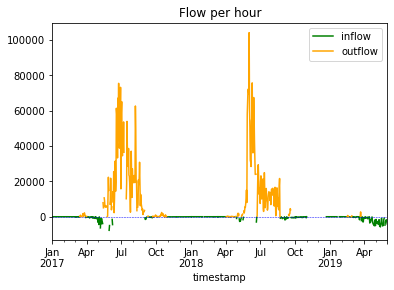

In [48]:
ax1 = netflow_sch[netflow_sch < 0].plot(title="Flow per hour", color="green")
netflow_sch[netflow_sch > 0].plot(ax=ax1, color="orange")
ax1.legend(["inflow", "outflow"])
#mark input=output line 

ax1.axhline(y=0, color='blue', linestyle='--', linewidth = 0.5)

## Humidity <br>

Humidity over Hour. With Optimum between 50% and 60%.

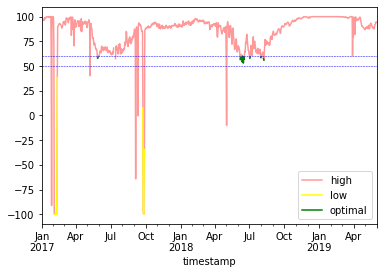

In [49]:
#seperate low and optimal data
low_humid = humidity_sch[humidity_sch < 50]
optimal_humid = humidity_sch[(humidity_sch > 50) & (humidity_sch < 60)]

#plot all, low and optimal data
ax1=humidity_sch.plot(color="red", alpha = 0.4)
low_humid.plot(ax=ax1, color="yellow")
optimal_humid.plot(ax=ax1, color="green")
ax1.legend(["high","low","optimal"])

#mark optimal boarder in graph
ax1.axhline(y=50, color='blue', linestyle='--', linewidth=0.5)
ax1.axhline(y=60, color='blue', linestyle='--', linewidth=0.5)

## Temperature <br>
Temperature of the Hive over time. With optimal Temperature between 30 and 35 °C.

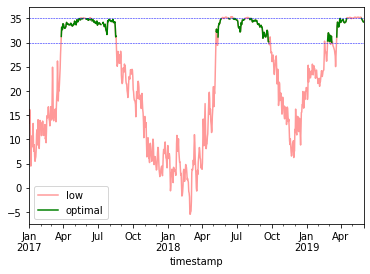

In [50]:
#seperate optimal data
optimal_temp = temperature_sch[(temperature_sch >= 30) & (temperature_sch <= 35)]

#plot all and optimal data
ax2=temperature_sch.plot(color="red", alpha = 0.4)
optimal_temp.plot(ax=ax2, color="green")
ax2.legend(["low","optimal"])

#mark optimal boarder in graph
ax2.axhline(y=30, color='blue', linestyle='--', linewidth=0.5)
ax2.axhline(y=35, color='blue', linestyle='--', linewidth=0.5)

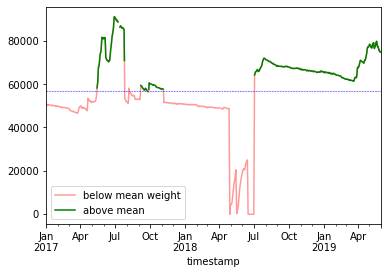

In [51]:
#seperate above mean
above_mean = weight_sch[weight_sch > weight_sch["weight"].mean()]

#plot all and above mean data
ax3 = weight_sch.plot(color="red", alpha = 0.4)
above_mean.plot(ax=ax3, color="green")
ax3.legend(["below mean weight","above mean"])

#mark mean
ax3.axhline(y=weight_sch["weight"].mean(), color='blue', linestyle='--', linewidth=0.5)

# Analysis of the Bee Hive Data from Würzburg

In [52]:
temp_wu = "temperature_wurzburg.csv"
flow_wu = "flow_wurzburg.csv"
weight_wu = "weight_wurzburg.csv"
humidity_wu = "humidity_wurzburg.csv"

In [53]:
#calling mean_per_hour function on the input files
netflow_wu = mean_per_hour(flow_wu)
temperature_wu = mean_per_hour(temp_wu)
weight_wu = mean_per_hour(weight_wu)
humidity_wu = mean_per_hour(humidity_wu)

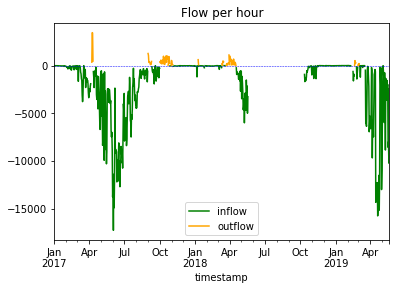

In [54]:
ax = netflow_wu[netflow_wu < 0].plot(title="Flow per hour", color="green")
netflow_wu[netflow_wu > 0].plot(ax=ax, color="orange")
ax.legend(["inflow", "outflow"])
#mark input=output line 
ax.axhline(y=0, color='blue', linestyle='--', linewidth = 0.5)

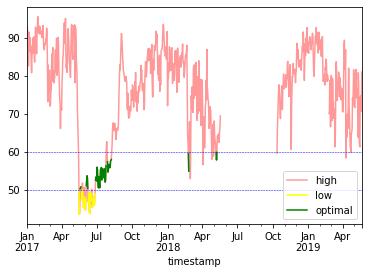

In [55]:
#seperate low and optimal data
low_humid = humidity_wu[humidity_wu <= 50]
optimal_humid = humidity_wu[(humidity_wu >= 50) & (humidity_wu <= 60)]

#plot all, low and optimal data
ax1=humidity_wu.plot(color="red", alpha = 0.4)
low_humid.plot(ax=ax1, color="yellow")
optimal_humid.plot(ax=ax1, color="green")
ax1.legend(["high","low","optimal"])

#mark optimal boarder in graph
ax1.axhline(y=50, color='blue', linestyle='--', linewidth=0.5)
ax1.axhline(y=60, color='blue', linestyle='--', linewidth=0.5)

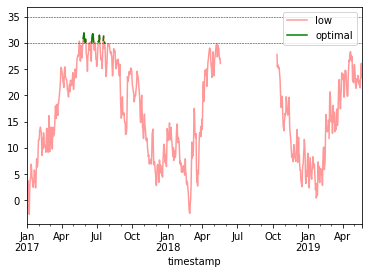

In [56]:
#seperate optimal data
optimal_temp = temperature_wu[(temperature_wu >= 30) & (temperature_wu <= 35)]

#plot all and optimal data
ax2=temperature_wu.plot(color="red", alpha = 0.4)
optimal_temp.plot(ax=ax2, color="green")
ax2.legend(["low","optimal"])

#mark optimal boarder in graph
ax2.axhline(y=30, color='blue', linestyle='--', linewidth=0.5)
ax2.axhline(y=35, color='blue', linestyle='--', linewidth=0.5)

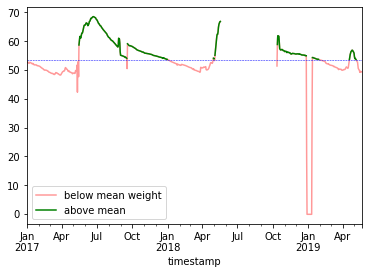

In [57]:
#seperate above mean
above_mean = weight_wu[weight_wu > weight_wu["weight"].mean()]

#plot all and above mean data
ax3 = weight_wu.plot(color="red", alpha = 0.4)
above_mean.plot(ax=ax3, color="green")
ax3.legend(["below mean weight","above mean"])

#mark mean
ax3.axhline(y=weight_wu["weight"].mean(), color='blue', linestyle='--', linewidth=0.5)